# Preprocessing

In [1]:
import importlib
import preprocessing as pp
#importlib.reload(pp)
import numpy as np
import pandas as pd
import ast
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


## Preprocess SEntFiN Dataset

In [4]:
# Load datase
data = pd.read_csv("data/SEntFiN_dataset/SEntFiN.csv")

# Convert decisions column of strs to column of dicts
data.Decisions = data.Decisions.apply(func=(lambda x: ast.literal_eval(x)))
# Mapping dict
sentiment_mapping = {'negative':-1,'neutral':0, 'positive': 1}
# Create column Subjects for keys of decision dict
data['Subjects'] = data.Decisions.apply(lambda x: list(x.keys()))
# Create column Sentiments for values of decision dict
data['Sentiments'] = data.Decisions.apply(lambda x: list(x.values()))
# Modify column Sentiments by mapping sentiments to ints
data['Sentiments'] = data.Sentiments.apply(lambda x: list(map(lambda a: sentiment_mapping[a],x)))
# Create column Sentiment to have average of sentiments column
data['Sentiment'] = data.Sentiments.apply(lambda x: np.mean(x))
# Create column rounded Sentiment to have non-float, int, values
data['Rounded Sentiment'] = data.Sentiments.apply(lambda x: np.fix(np.mean(x)+0.99*np.sign(np.mean(x))).astype(int))

# Get X and y's and z
X = data['Title']
y = dict()
y['Rounded'] = data['Rounded Sentiment']
y['Single'] = data['Sentiment']
y['Mutiple'] = data['Sentiments']
z = data['Subjects']

# Save dataframe here and y's and z and X_raw
# Processed/Expanded Raw Data Dataframe
data.to_pickle("data/SEntFiN_dataset/proc_exp_raw_dataframe.pkl")
np.save("data/SEntFiN_dataset/X_raw.npy", X.to_numpy(),allow_pickle=True)
np.save("data/SEntFiN_dataset/z_subjects.npy", z.to_numpy(),allow_pickle=True)
np.savez("data/SEntFiN_dataset/y.npz", rounded=y['Rounded'], single=y['Single'], multiple = y['Mutiple'])



# Apply bag of words, stemming
X_b = pp.bag_of_words(X)
X_c = pp.stemming(X_b)

# Save X_c here? 
# Bagged and Stemmed Title Data Lists...
np.save("data/SEntFiN_dataset/X_bag_stem.npy", np.asarray(X_c))




### Binary

In [193]:
# Extract Features: Binary [0,1] as reptition in title likely not useful info
X_d = pp.extract_features(X_c, binary=True)
df, cv, feature_matrix, feature_array = X_d

# Save df for names and feature_array for use as un-reduced
df.to_pickle("data/SEntFiN_dataset/X_df.pkl")
np.save("data/SEntFiN_dataset/X_full.npy", feature_array)

# Not needed as binary extraction above
#X_e = pp.normalize(feature_array)

print("Dataset Features: ")

print(f"Number of Samples: {feature_array.shape[0]}")
print(f"Number of Features: {feature_array.shape[1]}")

print(type(df))
print(df)
print(type(feature_array))
print(feature_array.shape)
print(feature_array)


pcaed, pca = pp.perform_PCA(feature_array, n_components=100)

# Save pcaed X_100
np.save("data/SEntFiN_dataset/X_100.npy", pcaed)

print("Dataset Features: 100")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)

pcaed, pca = pp.perform_PCA(feature_array, n_components=1000)

# Save pcaed X_1000
np.save("data/SEntFiN_dataset/X_1000.npy", pcaed)

print("Dataset Features: 1000")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)

pcaed, pca = pp.perform_PCA(feature_array, n_components=0.99)

# Save pcaed X_0_99
np.save("data/SEntFiN_dataset/X_0_99.npy", pcaed)

print("Dataset Features: 99% Variance")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)


# 11 min for Full non PCA, 100, 1000 and 99%
# 20 min for 0.999 and None combined


Dataset Features: 
Number of Samples: 10753
Number of Features: 7348
<class 'pandas.core.frame.DataFrame'>
       00  000  000cr  007  01  018  019  02  03  030  ...  zinc  zomato  \
0       0    0      0    0   0    0    0   0   0    0  ...     0       0   
1       0    0      0    0   0    0    0   0   0    0  ...     0       0   
2       0    0      0    0   0    0    0   0   0    0  ...     0       0   
3       0    0      0    0   0    0    0   0   0    0  ...     0       0   
4       0    0      0    0   0    0    0   0   0    0  ...     0       0   
...    ..  ...    ...  ...  ..  ...  ...  ..  ..  ...  ...   ...     ...   
10748   0    0      0    0   0    0    0   0   0    0  ...     0       0   
10749   0    0      0    0   0    0    0   0   0    0  ...     0       0   
10750   0    0      0    0   0    0    0   0   0    0  ...     0       0   
10751   0    0      0    0   0    0    0   0   0    0  ...     0       0   
10752   0    0      0    0   0    0    0   0   0    0  ..

In [8]:
#if saved
feature_array = np.load("data/SEntFiN_dataset/X_full.npy")

pcaed, pca = pp.perform_PCA(feature_array, n_components=200)

# Save pcaed X_200
np.save("data/SEntFiN_dataset/X_200.npy", pcaed)

print("Dataset Features: 200")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)

pcaed, pca = pp.perform_PCA(feature_array, n_components=400)

# Save pcaed X_400
np.save("data/SEntFiN_dataset/X_400.npy", pcaed)

print("Dataset Features: 400")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)

pcaed, pca = pp.perform_PCA(feature_array, n_components=700)

# Save pcaed X_700
np.save("data/SEntFiN_dataset/X_700.npy", pcaed)

print("Dataset Features: 700")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)

pcaed, pca = pp.perform_PCA(feature_array, n_components=1400)

# Save pcaed X_1400
np.save("data/SEntFiN_dataset/X_1400.npy", pcaed)

print("Dataset Features: 1400")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)

pcaed, pca = pp.perform_PCA(feature_array, n_components=2000)

# Save pcaed X_2000
np.save("data/SEntFiN_dataset/X_2000.npy", pcaed)

print("Dataset Features: 2000")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)

Dataset Features: 200
Number of Samples: 10753
Number of Features: 200
[[ 0.31605828 -0.07829696 -0.2403327  ... -0.00856559 -0.03678532
  -0.0312586 ]
 [ 1.54591312  0.077805   -0.12198264 ... -0.0163855   0.01429074
  -0.02977608]
 [-0.19776173 -0.08092066 -0.01876713 ...  0.07691395  0.01816658
  -0.00310838]
 ...
 [-0.21022969 -0.17901434  0.08711798 ...  0.01789617 -0.036235
   0.01171837]
 [-0.21698684 -0.1901259   0.10206612 ... -0.01501526 -0.01263517
   0.01609372]
 [-0.19921907 -0.21698165  0.0220624  ... -0.0899069  -0.16973144
  -0.00543622]]
Dataset Features: 400
Number of Samples: 10753
Number of Features: 400
[[ 3.16058283e-01 -7.82969639e-02 -2.40332698e-01 ...  2.40773448e-02
  -1.63539683e-02  5.08730228e-03]
 [ 1.54591312e+00  7.78049986e-02 -1.21982642e-01 ...  1.22118349e-02
  -4.33720358e-03  7.17705925e-03]
 [-1.97761725e-01 -8.09206569e-02 -1.87671385e-02 ...  1.93704166e-02
  -1.55685592e-02  1.51964295e-01]
 ...
 [-2.10229690e-01 -1.79014337e-01  8.71179787e-0

In [9]:
pcaed, pca = pp.perform_PCA(feature_array, n_components=3000)
# Save pcaed X_3000
np.save("data/SEntFiN_dataset/X_3000.npy", pcaed)

print("Dataset Features: 3000")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)

pcaed, pca = pp.perform_PCA(feature_array, n_components=4000)
# Save pcaed X_4000
np.save("data/SEntFiN_dataset/X_4000.npy", pcaed)

print("Dataset Features: 4000")
print(f"Number of Samples: {pcaed.shape[0]}")
print(f"Number of Features: {pcaed.shape[1]}")
print(pcaed)

Dataset Features: 3000
Number of Samples: 10753
Number of Features: 3000
[[ 3.16058283e-01 -7.82969639e-02 -2.40332698e-01 ... -1.02351283e-02
  -4.38506248e-04 -1.76467783e-03]
 [ 1.54591312e+00  7.78049986e-02 -1.21982642e-01 ... -5.19730665e-03
   1.51935598e-03 -2.55258192e-03]
 [-1.97761725e-01 -8.09206569e-02 -1.87671384e-02 ...  4.14183459e-03
  -7.56543763e-03 -4.50520017e-04]
 ...
 [-2.10229690e-01 -1.79014337e-01  8.71179787e-02 ...  1.18324353e-03
  -4.20022885e-03 -3.64029455e-03]
 [-2.16986841e-01 -1.90125903e-01  1.02066116e-01 ...  7.59796999e-04
  -2.66865678e-03 -1.46956942e-03]
 [-1.99219065e-01 -2.16981645e-01  2.20623981e-02 ...  1.54533551e-03
  -9.93330345e-04  9.40760519e-04]]
Dataset Features: 4000
Number of Samples: 10753
Number of Features: 4000
[[ 3.16058283e-01 -7.82969639e-02 -2.40332698e-01 ...  3.96130057e-03
  -2.03965821e-03  1.10926320e-02]
 [ 1.54591312e+00  7.78049986e-02 -1.21982642e-01 ...  4.75530680e-03
   2.65350582e-04  1.15255231e-03]
 [-1.977

## Visualizations

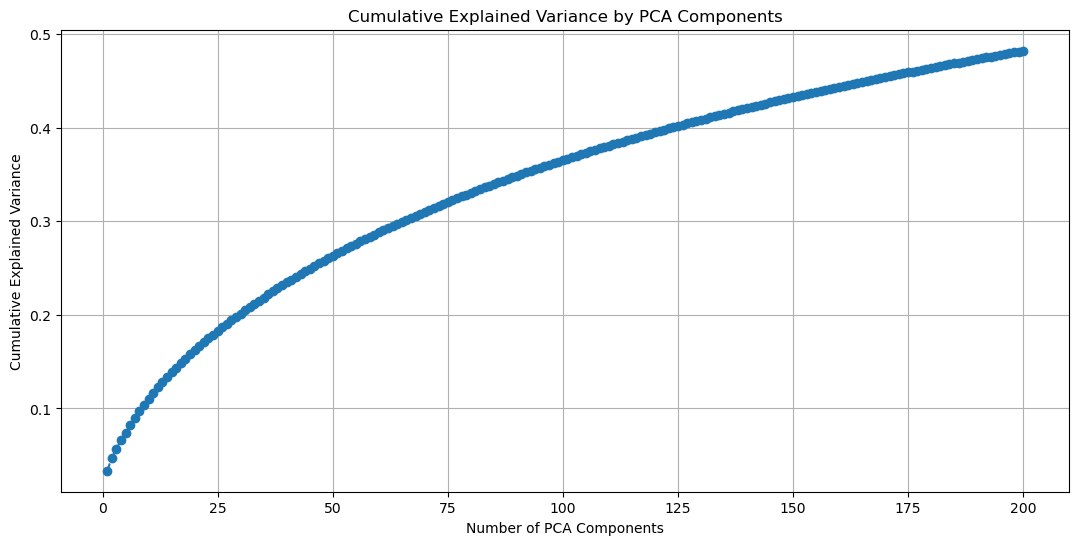

In [5]:
pca = PCA(n_components=200) 

#if saved
feature_array = np.load("data/SEntFiN_dataset/X_full.npy")

X_pca = pca.fit_transform(feature_array)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(13, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

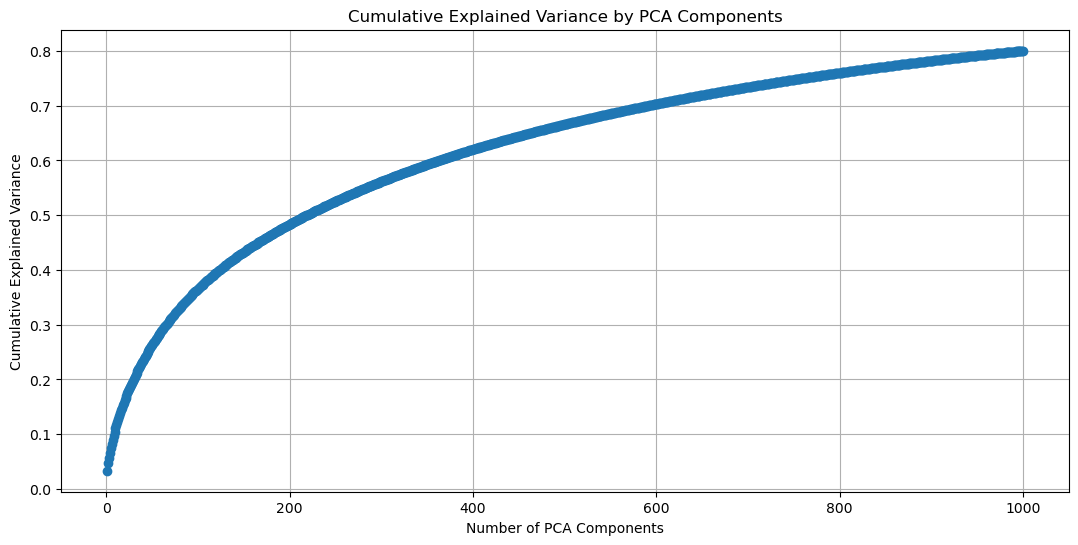

In [6]:
pca = PCA(n_components=1000) 

X_pca = pca.fit_transform(feature_array)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(13, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

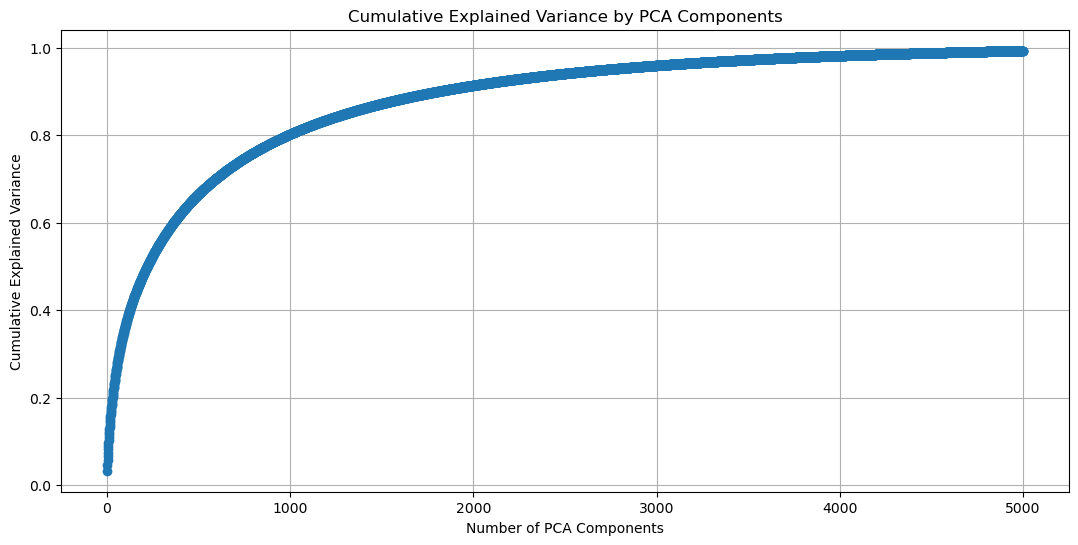

In [7]:
pca = PCA(n_components=5000) 

X_pca = pca.fit_transform(feature_array)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(13, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Testing

In [3]:
#test data:

A = ["SpiceJet to issue 6.4 crore warrants to promoters",
    "MMTC Q2 net loss at Rs 10.4 crore",
    "Mid-cap funds can deliver more, stay put: Experts"
]

print(A)
B = pp.bag_of_words(A)
print(B)
print(len(B))

['SpiceJet to issue 6.4 crore warrants to promoters', 'MMTC Q2 net loss at Rs 10.4 crore', 'Mid-cap funds can deliver more, stay put: Experts']
[['SpiceJet', 'to', 'issue', '6.4', 'crore', 'warrants', 'to', 'promoters'], ['MMTC', 'Q2', 'net', 'loss', 'at', 'Rs', '10.4', 'crore'], ['Mid-cap', 'funds', 'can', 'deliver', 'more', ',', 'stay', 'put', ':', 'Experts']]
3


In [4]:
C = pp.stemming(B)
print(C)

[' spicejet to issu 6.4 crore warrant to promot', ' mmtc q2 net loss at rs 10.4 crore', ' mid-cap fund can deliv more , stay put : expert']


In [7]:
import preprocessing as pp
x = pp.extract_features(C)
df, cv, feature_matrix, feature_array  = x
print(type(df))
print(df)
print(type(cv))
print(cv)
print(type(feature_matrix))
print(feature_matrix)
print(type(feature_array))
print(feature_array)



<class 'pandas.core.frame.DataFrame'>
   10  cap  crore  deliv  expert  fund  issu  loss  mid  mmtc  net  promot  \
0   0    0      1      0       0     0     1     0    0     0    0       1   
1   1    0      1      0       0     0     0     1    0     1    1       0   
2   0    1      0      1       1     1     0     0    1     0    0       0   

   q2  rs  spicejet  stay  warrant  
0   0   0         1     0        1  
1   1   1         0     0        0  
2   0   0         0     1        0  
<class 'sklearn.feature_extraction.text.CountVectorizer'>
CountVectorizer(stop_words='english', strip_accents='ascii')
<class 'scipy.sparse._csr.csr_matrix'>
  (0, 14)	1
  (0, 6)	1
  (0, 2)	1
  (0, 16)	1
  (0, 11)	1
  (1, 2)	1
  (1, 9)	1
  (1, 12)	1
  (1, 10)	1
  (1, 7)	1
  (1, 13)	1
  (1, 0)	1
  (2, 8)	1
  (2, 1)	1
  (2, 5)	1
  (2, 3)	1
  (2, 15)	1
  (2, 4)	1
<class 'numpy.ndarray'>
[[0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1]
 [1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0]
 [0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0]]


In [15]:
fn = cv.get_feature_names_out()
print(fn)
fn = np.asarray(fn)
print(type(fn))
new_df = pd.DataFrame(data=feature_array, columns=fn,)
print(df.equals(new_df))
np.savez("data/test", feature_array=feature_array, feature_names=fn)

['10' 'cap' 'crore' 'deliv' 'expert' 'fund' 'issu' 'loss' 'mid' 'mmtc'
 'net' 'promot' 'q2' 'rs' 'spicejet' 'stay' 'warrant']
<class 'numpy.ndarray'>
True


In [22]:
d = np.load("data/test.npz", allow_pickle=True)

print(d)
print(d['feature_array'], d['feature_names'])

NpzFile 'data/test.npz' with keys: feature_array, feature_names
[[0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1]
 [1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0]
 [0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0]] ['10' 'cap' 'crore' 'deliv' 'expert' 'fund' 'issu' 'loss' 'mid' 'mmtc'
 'net' 'promot' 'q2' 'rs' 'spicejet' 'stay' 'warrant']


In [24]:
print(feature_array)

fa_norm, mms = pp.normalize(feature_array)

print(fa_norm)

[[0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1]
 [1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0]
 [0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0]]
[[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [33]:
pcaed, pca = pp.perform_PCA(fa_norm, n_components=None)

print(pcaed)

pcaed, pca = pp.perform_PCA(fa_norm, n_components=0.999)

print(pcaed)

[[-3.46772613e-01  1.76124132e+00  1.88701629e-16]
 [-1.61101932e+00 -1.13732389e+00  1.88701629e-16]
 [ 1.95779194e+00 -6.23917427e-01  1.88701629e-16]]
[[-0.34677261  1.76124132]
 [-1.61101932 -1.13732389]
 [ 1.95779194 -0.62391743]]


In [156]:
E = pd.read_csv("data/SEntFiN_dataset/SEntFiN.csv")
print(E)

       S No.                                              Title  \
0          1  SpiceJet to issue 6.4 crore warrants to promoters   
1          2                  MMTC Q2 net loss at Rs 10.4 crore   
2          3  Mid-cap funds can deliver more, stay put: Experts   
3          4             Mid caps now turn into market darlings   
4          5  Market seeing patience, if not conviction: Pra...   
...      ...                                                ...   
10748  10749       Negative on Chambal, Advanta: Mitesh Thacker   
10749  10750     Small, Mid-cap stocks may emerge outperformers   
10750  10751                      Rupee slips against US dollar   
10751  10752                       Rupee weak against US dollar   
10752  10753                Australia shares flat; energy drags   

                                               Decisions  Words  
0                                {'SpiceJet': 'neutral'}      8  
1                                    {'MMTC': 'neutral'}      8

In [157]:
# Corrections
print(E['Decisions'][0])
print(type(E['Decisions'][0]))

E.Decisions = E.Decisions.apply(func=(lambda x: ast.literal_eval(x)))
print(E['Decisions'][0])
print(type(E['Decisions'][0]))

{'SpiceJet': 'neutral'}
<class 'str'>
{'SpiceJet': 'neutral'}
<class 'dict'>


In [173]:
print(E['Decisions'][0]['SpiceJet'])
dict(E['Decisions'][0]).values()
sentiment_mapping = {'negative':-1,'neutral':0, 'positive': 1}
#print(list(E['Decisions'][0].values()))
#p = list(E['Decisions'][0].values())
#print(a for a in map(p, sentiment_mapping))
#print(list(map(sentiment_mapping, p)))
#E[['Subjects','Sentiments']] = E.Decisions.apply(lambda x: [list(x.keys()), list(map(sentiment_mapping, list(x.items())))])
E['Subjects'] = E.Decisions.apply(lambda x: list(x.keys()))
E['Sentiments'] = E.Decisions.apply(lambda x: list(x.values()))
E['Sentiments'] = E.Sentiments.apply(lambda x: list(map(lambda a: sentiment_mapping[a],x)))
E['Sentiment'] = E.Sentiments.apply(lambda x: np.mean(x))
#df_cat['size'].map(size_mapping)
#df_cat['classlabel'] =
#class_le.fit_transform(df_cat['classlabel'].values)
E['Rounded Sentiment'] = E.Sentiments.apply(lambda x: np.fix(np.mean(x)+0.99*np.sign(np.mean(x))).astype(int))
print(E)

neutral
       S No.                                              Title  \
0          1  SpiceJet to issue 6.4 crore warrants to promoters   
1          2                  MMTC Q2 net loss at Rs 10.4 crore   
2          3  Mid-cap funds can deliver more, stay put: Experts   
3          4             Mid caps now turn into market darlings   
4          5  Market seeing patience, if not conviction: Pra...   
...      ...                                                ...   
10748  10749       Negative on Chambal, Advanta: Mitesh Thacker   
10749  10750     Small, Mid-cap stocks may emerge outperformers   
10750  10751                      Rupee slips against US dollar   
10751  10752                       Rupee weak against US dollar   
10752  10753                Australia shares flat; energy drags   

                                               Decisions  Words  \
0                                {'SpiceJet': 'neutral'}      8   
1                                    {'MMTC': 'neutra

In [174]:
X = E['Title']
y = E['Rounded Sentiment']
print(X,y)

0        SpiceJet to issue 6.4 crore warrants to promoters
1                        MMTC Q2 net loss at Rs 10.4 crore
2        Mid-cap funds can deliver more, stay put: Experts
3                   Mid caps now turn into market darlings
4        Market seeing patience, if not conviction: Pra...
                               ...                        
10748         Negative on Chambal, Advanta: Mitesh Thacker
10749       Small, Mid-cap stocks may emerge outperformers
10750                        Rupee slips against US dollar
10751                         Rupee weak against US dollar
10752                  Australia shares flat; energy drags
Name: Title, Length: 10753, dtype: object 0        0
1        0
2        1
3        1
4        0
        ..
10748   -1
10749    1
10750   -1
10751   -1
10752    0
Name: Rounded Sentiment, Length: 10753, dtype: int64


In [175]:
X_B = pp.bag_of_words(X)
print(X_B)

[['SpiceJet', 'to', 'issue', '6.4', 'crore', 'warrants', 'to', 'promoters'], ['MMTC', 'Q2', 'net', 'loss', 'at', 'Rs', '10.4', 'crore'], ['Mid-cap', 'funds', 'can', 'deliver', 'more', ',', 'stay', 'put', ':', 'Experts'], ['Mid', 'caps', 'now', 'turn', 'into', 'market', 'darlings'], ['Market', 'seeing', 'patience', ',', 'if', 'not', 'conviction', ':', 'Prakash', 'Diwan'], ['Infosys', ':', 'Will', 'the', 'strong', 'volume', 'growth', 'sustain', '?'], ['Hudco', 'raises', 'Rs', '279', 'cr', 'via', 'tax-free', 'bonds'], ['HOEC', 'could', 'retest', '30-35', 'levels', ':', 'Ashwani', 'Gujral'], ['Gold', 'shines', 'on', 'seasonal', 'demand', ';', 'Silver', 'dull'], ['Genpact', 'appoints', 'Edward', 'J', 'Fitzpatrick', 'as', 'CFO'], ['EXL', 'beats', 'profit', 'estimates', ',', 'cuts', 'sales', 'outlook'], ['Wait', 'and', 'watch', 'on', 'Bharti', 'Airtel', ':', 'Vinay', 'Khattar'], ['Would', 'stick', 'to', 'banking', ':', 'Girish', 'Pai', ',', 'Centrum', 'Broking'], ['MSCI', 'adds', 'Aurobindo',

In [176]:
X_C = pp.stemming(X_B)
print(X_C)

[' spicejet to issu 6.4 crore warrant to promot', ' mmtc q2 net loss at rs 10.4 crore', ' mid-cap fund can deliv more , stay put : expert', ' mid cap now turn into market darl', ' market see patienc , if not convict : prakash diwan', ' infosi : will the strong volum growth sustain ?', ' hudco rais rs 279 cr via tax-fre bond', ' hoec could retest 30-35 level : ashwani gujral', ' gold shine on season demand ; silver dull', ' genpact appoint edward j fitzpatrick as cfo', ' exl beat profit estim , cut sale outlook', ' wait and watch on bharti airtel : vinay khattar', ' would stick to bank : girish pai , centrum broke', ' msci add aurobindo pharma to india index', ' ashok leyland rais rs 667 crore through qip', ' at wipro , growth remain a mirag', ' whi chines stock leav us investor vulner', ' us stock finish mix amid more tech sell', ' opec reduc estim on oil demand growth', ' oil price mix ahead of us suppli report', ' makemytrip expand share sale plan', ' gur close quiet on some support'

In [190]:
X_x = pp.extract_features(X_C, binary=True)
df, cv, feature_matrix, feature_array  = X_x
print(type(df))
print(df)
print(type(cv))
print(cv)
print(type(feature_matrix))
print(feature_matrix)
print(feature_matrix)
print(type(feature_array))
print(feature_array.shape)
print(feature_array)

<class 'pandas.core.frame.DataFrame'>
       00  000  000cr  007  01  018  019  02  03  030  ...  zinc  zomato  \
0       0    0      0    0   0    0    0   0   0    0  ...     0       0   
1       0    0      0    0   0    0    0   0   0    0  ...     0       0   
2       0    0      0    0   0    0    0   0   0    0  ...     0       0   
3       0    0      0    0   0    0    0   0   0    0  ...     0       0   
4       0    0      0    0   0    0    0   0   0    0  ...     0       0   
...    ..  ...    ...  ...  ..  ...  ...  ..  ..  ...  ...   ...     ...   
10748   0    0      0    0   0    0    0   0   0    0  ...     0       0   
10749   0    0      0    0   0    0    0   0   0    0  ...     0       0   
10750   0    0      0    0   0    0    0   0   0    0  ...     0       0   
10751   0    0      0    0   0    0    0   0   0    0  ...     0       0   
10752   0    0      0    0   0    0    0   0   0    0  ...     0       0   

       zone  zoom  zuari  zuckerberg  zurich  zyd

In [180]:
fn = cv.get_feature_names_out()
print(fn)
fn = np.asarray(fn)
print(type(fn))
print(fn.shape)

['00' '000' '000cr' ... 'zydu' 'zyl' 'zylog']
<class 'numpy.ndarray'>
(7348,)


In [191]:
#Features are binary so no need to normalize

pcaed, pca = pp.perform_PCA(feature_array, n_components=None)

print(pcaed.shape)
print(pcaed)

pcaed, pca = pp.perform_PCA(feature_array, n_components=0.999)

print(pcaed.shape)
print(pcaed)

(10753, 7348)
[[ 3.16058283e-01 -7.82969639e-02 -2.40332698e-01 ... -9.86341482e-18
  -1.50956504e-18  5.80135380e-18]
 [ 1.54591312e+00  7.78049986e-02 -1.21982642e-01 ...  5.61593630e-17
   1.33638089e-17  4.37729099e-18]
 [-1.97761725e-01 -8.09206569e-02 -1.87671384e-02 ... -5.13654586e-18
  -1.94465554e-18 -9.61180427e-18]
 ...
 [-2.10229690e-01 -1.79014337e-01  8.71179787e-02 ... -5.78202718e-18
   1.16756281e-17 -1.41674576e-19]
 [-2.16986841e-01 -1.90125903e-01  1.02066116e-01 ...  3.90086959e-18
   2.44304235e-18 -5.69249343e-18]
 [-1.99219065e-01 -2.16981645e-01  2.20623981e-02 ...  1.98026736e-17
   8.60089298e-18  1.58970890e-17]]
(10753, 5860)
[[ 3.16058283e-01 -7.82969639e-02 -2.40332698e-01 ... -6.28852235e-03
  -1.05234959e-02 -3.26497421e-03]
 [ 1.54591312e+00  7.78049986e-02 -1.21982642e-01 ...  2.26886942e-03
  -2.69038874e-03 -6.98563962e-04]
 [-1.97761725e-01 -8.09206569e-02 -1.87671384e-02 ... -3.25222977e-03
   3.11910029e-03 -1.38918722e-04]
 ...
 [-2.10229690e-0